# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Make a URL to gather links from material that is paginated.
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Gather this page's HTML data.
    response = requests.get(url)

    # Compute the content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())

    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [17]:
DataFrame = pd.DataFrame()
DataFrame["reviews"] = reviews
DataFrame.head()

,reviews
0,✅ Trip Verified | I had broken my leg 2 days ...
1,✅ Trip Verified | Check in at MIA straightforw...
2,✅ Trip Verified | Never I saw such a terribl...
3,✅ Trip Verified | Having not flown with BA fo...
4,✅ Trip Verified | Dear Community I feel compel...


Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [18]:
DataFrame

,reviews
0,✅ Trip Verified | I had broken my leg 2 days ...
1,✅ Trip Verified | Check in at MIA straightforw...
2,✅ Trip Verified | Never I saw such a terribl...
3,✅ Trip Verified | Having not flown with BA fo...
4,✅ Trip Verified | Dear Community I feel compel...
...,...
995,✅ Trip Verified | Miami to London. The breakf...
996,✅ Trip Verified | Copenhagen to Amsterdam via ...
997,✅ Trip Verified | Antigua to Gatwick. Apparen...
998,✅ Trip Verified | I understand completely why ...


Taking off the components that were previously in the reviews column

In [19]:
DataFrame.reviews= DataFrame.reviews.str.split('|',expand=True)[1]



In [20]:
DataFrame

,reviews
0,I had broken my leg 2 days before our return...
1,Check in at MIA straightforward. BA use Ameri...
2,Never I saw such a terrible customer experi...
3,"Having not flown with BA for a few years, I ..."
4,Dear Community I feel compelled to share the ...
...,...
995,Miami to London. The breakfast served just b...
996,Copenhagen to Amsterdam via London Heathrow w...
997,Antigua to Gatwick. Apparently it is necessa...
998,I understand completely why there is air rage...


**Rule-based approach**

This is a practical approach to analyzing text without training or using machine learning models. The result of this approach is a set of rules based on which the text is labeled as positive/negative/neutral. These rules are also known as lexicons. Hence, the Rule-based approach is called Lexicon based approach.

Widely used lexicon-based approaches are TextBlob, VADER, SentiWordNet.

**Data preprocessing steps:**

Cleaning the text

Tokenization

Enrichment – POS tagging

Stopwords removal

Obtaining the stem words

# Step 1: Tightening up the text

In [37]:
import re

# Define a function to clean the text
def clean(text):
# Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text

# Cleaning the text in the review column
DataFrame['Cleaned Reviews'] = DataFrame['reviews'].apply(clean)
DataFrame.head()

,reviews,Cleaned Reviews,POS tagged,Lemma,Sentiment,Analysis
0,I had broken my leg 2 days before our return...,I had broken my leg days before our return fl...,"[(broken, v), (leg, a), (days, n), (return, n)...",break leg day return flight Lisbon London ca...,0.7506,Positive
1,Check in at MIA straightforward. BA use Ameri...,Check in at MIA straightforward BA use Americ...,"[(Check, n), (MIA, n), (straightforward, n), (...",Check MIA straightforward BA use American fl...,0.2885,Neutral
2,Never I saw such a terrible customer experi...,Never I saw such a terrible customer experien...,"[(Never, r), (saw, v), (terrible, a), (custome...",Never saw terrible customer experience plane...,0.0575,Neutral
3,"Having not flown with BA for a few years, I ...",Having not flown with BA for a few years I re...,"[(flown, v), (BA, n), (years, n), (read, v), (...",fly BA year read review preparation needle s...,-0.6707,Negative
4,Dear Community I feel compelled to share the ...,Dear Community I feel compelled to share the ...,"[(Dear, n), (Community, n), (feel, v), (compel...",Dear Community feel compel share utter frust...,-0.9681,Negative


In [36]:
import nltk

"""This punkt tokenizer divides a text into a list of sentences by using an unsupervised algorithm to build a model for abbreviation words,
collocations, and words that start sentences. """

nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [35]:
#The nltk.corpus package defines a collection of corpus reader classes, which can be used to access the contents of a diverse set of corpora.


nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    #print(tags)
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
          #print(tag[0])
          #print(pos_dict.get(tag[0]))
    return newlist

DataFrame['POS tagged'] = DataFrame['Cleaned Reviews'].apply(token_stop_pos)
DataFrame.head()

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,reviews,Cleaned Reviews,POS tagged,Lemma,Sentiment,Analysis
0,I had broken my leg 2 days before our return...,I had broken my leg days before our return fl...,"[(broken, v), (leg, a), (days, n), (return, n)...",break leg day return flight Lisbon London ca...,0.7506,Positive
1,Check in at MIA straightforward. BA use Ameri...,Check in at MIA straightforward BA use Americ...,"[(Check, n), (MIA, n), (straightforward, n), (...",Check MIA straightforward BA use American fl...,0.2885,Neutral
2,Never I saw such a terrible customer experi...,Never I saw such a terrible customer experien...,"[(Never, r), (saw, v), (terrible, a), (custome...",Never saw terrible customer experience plane...,0.0575,Neutral
3,"Having not flown with BA for a few years, I ...",Having not flown with BA for a few years I re...,"[(flown, v), (BA, n), (years, n), (read, v), (...",fly BA year read review preparation needle s...,-0.6707,Negative
4,Dear Community I feel compelled to share the ...,Dear Community I feel compelled to share the ...,"[(Dear, n), (Community, n), (feel, v), (compel...",Dear Community feel compel share utter frust...,-0.9681,Negative


In [25]:
# Obtaining the stem words – Lemmatization

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

DataFrame['Lemma'] = DataFrame['POS tagged'].apply(lemmatize)
DataFrame.head()

,reviews,Cleaned Reviews,POS tagged,Lemma
0,I had broken my leg 2 days before our return...,I had broken my leg days before our return fl...,"[(broken, v), (leg, a), (days, n), (return, n)...",break leg day return flight Lisbon London ca...
1,Check in at MIA straightforward. BA use Ameri...,Check in at MIA straightforward BA use Americ...,"[(Check, n), (MIA, n), (straightforward, n), (...",Check MIA straightforward BA use American fl...
2,Never I saw such a terrible customer experi...,Never I saw such a terrible customer experien...,"[(Never, r), (saw, v), (terrible, a), (custome...",Never saw terrible customer experience plane...
3,"Having not flown with BA for a few years, I ...",Having not flown with BA for a few years I re...,"[(flown, v), (BA, n), (years, n), (read, v), (...",fly BA year read review preparation needle s...
4,Dear Community I feel compelled to share the ...,Dear Community I feel compelled to share the ...,"[(Dear, n), (Community, n), (feel, v), (compel...",Dear Community feel compel share utter frust...


In [26]:
DataFrame[['reviews','Lemma']]

,reviews,Lemma
0,I had broken my leg 2 days before our return...,break leg day return flight Lisbon London ca...
1,Check in at MIA straightforward. BA use Ameri...,Check MIA straightforward BA use American fl...
2,Never I saw such a terrible customer experi...,Never saw terrible customer experience plane...
3,"Having not flown with BA for a few years, I ...",fly BA year read review preparation needle s...
4,Dear Community I feel compelled to share the ...,Dear Community feel compel share utter frust...
...,...,...
995,Miami to London. The breakfast served just b...,Miami London breakfast serve landing terribl...
996,Copenhagen to Amsterdam via London Heathrow w...,Copenhagen Amsterdam via London Heathrow Bri...
997,Antigua to Gatwick. Apparently it is necessa...,Antigua Gatwick Apparently necessary pay ext...
998,I understand completely why there is air rage...,understand completely air rage sky company B...


# Using VADER for Sentiment Analysis

Valence Aware Dictionary and Sentiment Reasoner is referred to as VADER.

Vader sentiment indicates both the degree of emotion and whether the phrase is good or bad.



In [38]:
!pip install vaderSentiment

In [39]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

DataFrame['Sentiment'] = DataFrame['Lemma'].apply(vadersentimentanalysis)

# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
DataFrame['Analysis'] = DataFrame['Sentiment'].apply(vader_analysis)
DataFrame.head()

,reviews,Cleaned Reviews,POS tagged,Lemma,Sentiment,Analysis
0,I had broken my leg 2 days before our return...,I had broken my leg days before our return fl...,"[(broken, v), (leg, a), (days, n), (return, n)...",break leg day return flight Lisbon London ca...,0.7506,Positive
1,Check in at MIA straightforward. BA use Ameri...,Check in at MIA straightforward BA use Americ...,"[(Check, n), (MIA, n), (straightforward, n), (...",Check MIA straightforward BA use American fl...,0.2885,Neutral
2,Never I saw such a terrible customer experi...,Never I saw such a terrible customer experien...,"[(Never, r), (saw, v), (terrible, a), (custome...",Never saw terrible customer experience plane...,0.0575,Neutral
3,"Having not flown with BA for a few years, I ...",Having not flown with BA for a few years I re...,"[(flown, v), (BA, n), (years, n), (read, v), (...",fly BA year read review preparation needle s...,-0.6707,Negative
4,Dear Community I feel compelled to share the ...,Dear Community I feel compelled to share the ...,"[(Dear, n), (Community, n), (feel, v), (compel...",Dear Community feel compel share utter frust...,-0.9681,Negative


In [40]:
vader_counts = DataFrame['Analysis'].value_counts()
vader_counts

Positive    478
Negative    413
Neutral     109
Name: Analysis, dtype: int64

# Graphic Illustration

([<matplotlib.patches.Wedge at 0x7d784b028550>,
 [Text(0.07596607924664532, 1.09737375346957, 'Positive'),
  Text(-0.4400321838621989, -1.008152606089705, 'Negative'),
  Text(1.2716193248090064, -0.4533037533181108, 'Neutral')],
 [Text(0.0414360432254429, 0.5985675018924926, '47.8%'),
  Text(-0.24001755483392664, -0.5499014215034754, '41.3%'),
  Text(0.8006492045093745, -0.28541347431140307, '10.9%')])

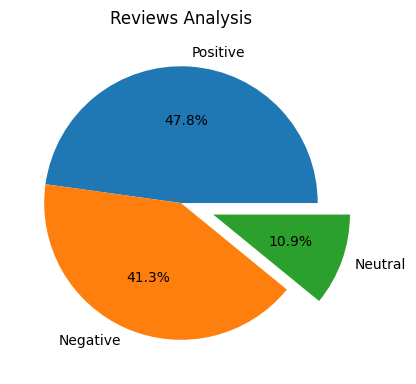

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))

plt.subplot(1,3,2)
plt.title("Reviews Analysis")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)

In [43]:
DataFrame.to_csv("BA_reviews.csv")

# Wordcloud

Visualising texts using tags or keywords from websites is possible with word clouds, also known as tag clouds.

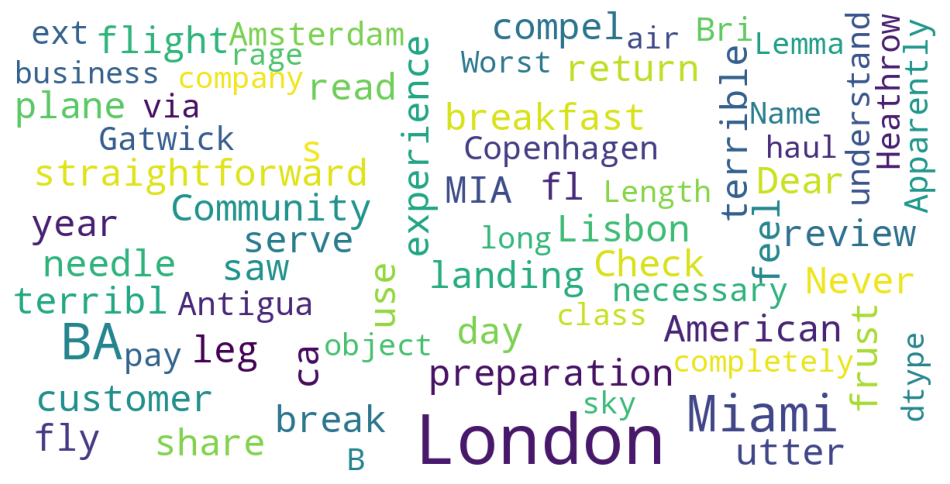

In [44]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df.Lemma)